# 00. Table of contents
 - Importing libraries
 - Importing Dataset
 - Creating bar charts
 - Creating historams
 - Replacing prices above 100 with NaNs
 - Creating line chart of prices vs. orders day of the week (on a sample)

# 01. Importing libraries


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing dataset

In [2]:
path = r'C:\Users\viki\Documents\Data Analytics\Immersion\Achievement 4\Instacart Basket Analysis'

In [3]:
ords_prods_merge= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_with_all_flags.pkl'))

# 03. Creating Bar Charts

[Text(0, 0, 'Saturday'),
 Text(1, 0, 'Sunday'),
 Text(2, 0, 'Monday'),
 Text(3, 0, 'Tuesday'),
 Text(4, 0, 'Wednesday'),
 Text(5, 0, 'Thursday'),
 Text(6, 0, 'Friday')]

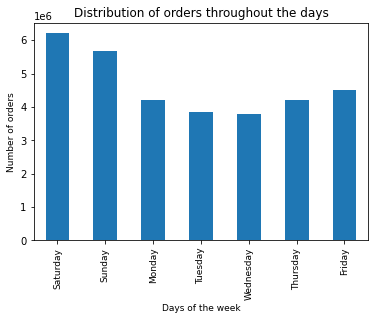

In [5]:
#create bar chart
q1_bar_days= ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.title('Distribution of orders throughout the days')
plt.xlabel("Days of the week", fontsize=9)
plt.ylabel("Number of orders",fontsize=9)

#renaming bar categories
q1_bar_days.set_xticklabels(['Saturday', 'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=90, fontsize=9)

<AxesSubplot:>

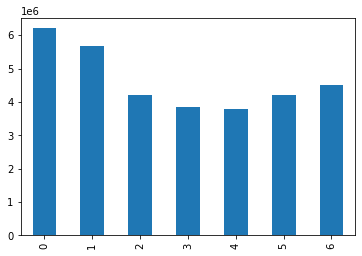

In [5]:
 # sort the chart values
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()


<AxesSubplot:>

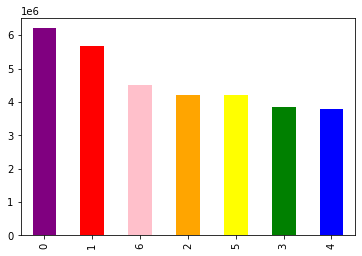

In [6]:
# adding color to the bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color= ['purple','red','pink','orange','yellow','green','blue'])

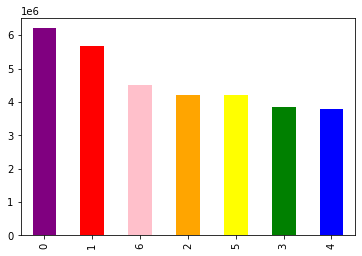

In [7]:
#saving bar chart
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [6]:
# exporting bar chart
q1_bar_days.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'q1_bar_days.png'),bbox_inches='tight')


# 04. Histograms

<AxesSubplot:ylabel='Frequency'>

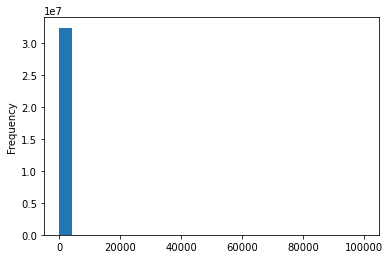

In [9]:
#creaing a histogram for the prices
ords_prods_merge['prices'].plot.hist(bins = 25)

In [10]:
#checking why histogram is weird
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<AxesSubplot:xlabel='prices', ylabel='prices'>

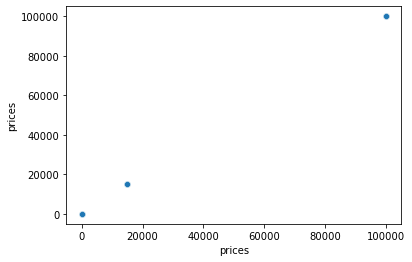

In [11]:
# creating a scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [12]:
#looking for outliers
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price_of_products_purchased,spending_flag,median_days_since_prior_order,frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High Spender,5.0,Frequent Customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High Spender,5.0,Frequent Customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High Spender,11.5,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High Spender,11.5,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High Spender,20.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High Spender,4.0,Frequent Customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High Spender,4.0,Frequent Customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Least busy days,Most orders,15,Regular customer,451.153540,High Spender,5.0,Frequent Customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Least busy days,Average orders,12,Regular customer,1178.381871,High Spender,11.0,Regular customer


In [13]:
# replacing outliers with NaNs
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [14]:
#checking if replacement was succesful
ords_prods_merge['prices'].max()

25.0

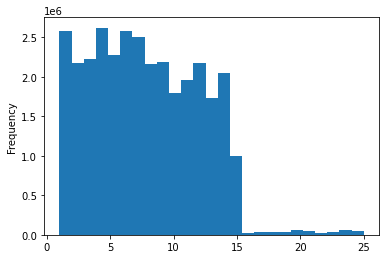

In [15]:
#histogram after data cleaning:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

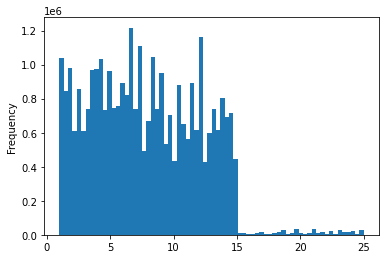

In [16]:
# increasing No.of bins in the histogram:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [17]:
# exporting the histogram
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [18]:
#exporting cleaned df with new columns in pickle format
ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_merged_4_9.pkl'))

# 05. Line Charts

In [19]:
# creating seed for sampling
np.random.seed(4)

In [20]:
# creating a list holding True/False valuesto the test np.random.rand()<= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [21]:
# store 70 % of the sample in df big
big = ords_prods_merge[dev]

In [22]:
# store 30 of the sample in the df small
small = ords_prods_merge[~dev]

In [23]:
# checking if the split was working
len(ords_prods_merge)

32404859

In [24]:
len(big)+len(small)

32404859

In [25]:
# creating subset with relevant columns for the line chart
df_2 = small[['orders_day_of_week','prices']]

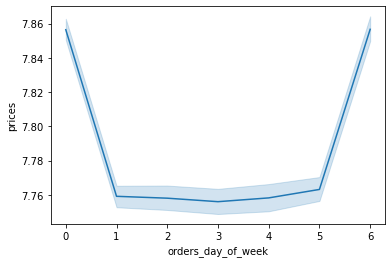

In [26]:
# creating line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [27]:
df_2.describe()

,orders_day_of_week,prices
count,9.721098e+06,9.719502e+06
mean,2.740095e+00,7.791261e+00
std,2.090351e+00,4.242010e+00
min,0.000000e+00,1.000000e+00
25%,1.000000e+00,4.200000e+00
50%,3.000000e+00,7.400000e+00
75%,5.000000e+00,1.130000e+01
max,6.000000e+00,2.500000e+01
